In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df1=df

In [22]:
df1.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [23]:
df1.tail(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [7]:
df.describe

<bound method NDFrame.describe of                  dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmar

In [41]:
df1.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [25]:
df1['AverageTemperature']=df1['AverageTemperature'].fillna(df1['AverageTemperature'].mean())
df1['AverageTemperatureUncertainty']=df1['AverageTemperatureUncertainty'].fillna(df1['AverageTemperatureUncertainty'].mean())

In [26]:
avg=df1.AverageTemperature.unique()
print(avg)

[ 6.068      16.72743264  5.788      ...  9.202       6.875
  6.66      ]


In [29]:
city_data=df1[df1['City']=='New York'].copy()
city_data['dt']=pd.to_datetime(city_data['dt'],errors='coerce')

In [35]:
city_data['year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('year')['AverageTemperature'].mean().reset_index()

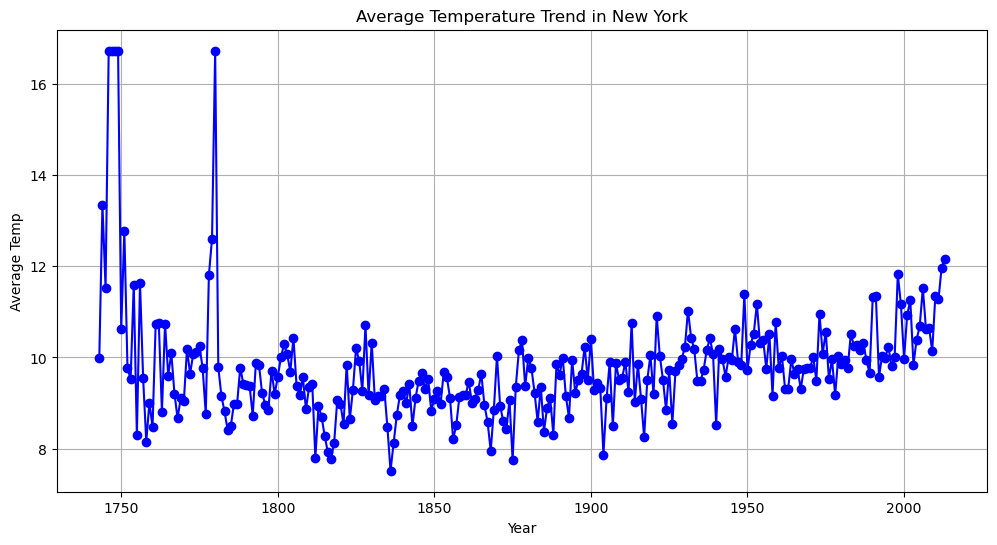

In [44]:
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['year'],annual_avg_temp['AverageTemperature'],linestyle='-',color='b',marker='o')
plt.title('Average Temperature Trend in New York')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.grid(True)

In [45]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [71]:
country_avg=df.groupby('Country')['AverageTemperature'].mean().reset_index()
print(country_avg)

         Country  AverageTemperature
0    Afghanistan           13.879560
1        Albania           15.552910
2        Algeria           17.762875
3         Angola           21.353405
4      Argentina           16.996885
..           ...                 ...
154    Venezuela           24.742074
155      Vietnam           24.343847
156        Yemen           25.412010
157       Zambia           20.412561
158     Zimbabwe           19.477522

[159 rows x 2 columns]


In [67]:
country_avg=country_avg.dropna()

In [72]:
top_countries=country_avg.sort_values(by='AverageTemperature',ascending=False).head(10)

<BarContainer object of 10 artists>

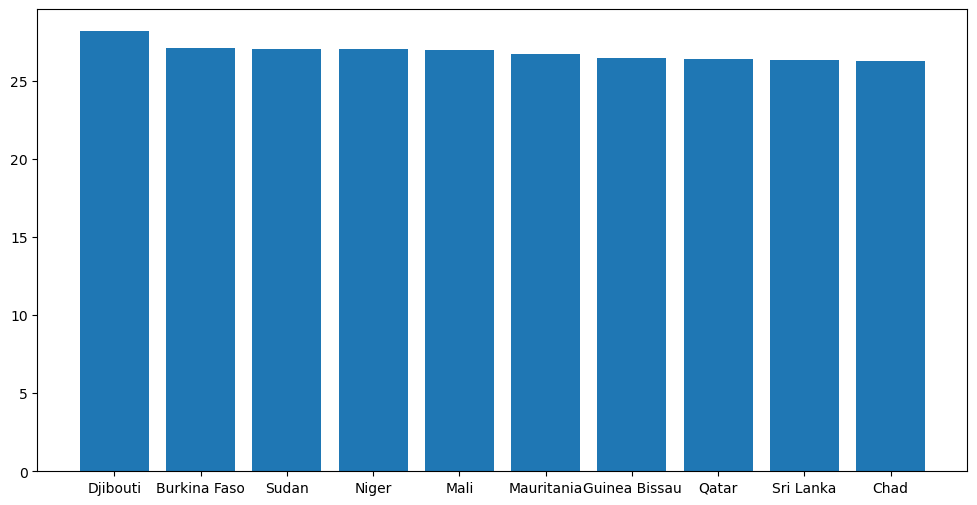

In [73]:
plt.figure(figsize=(12,6))
plt.bar(top_countries['Country'],top_countries['AverageTemperature'])

(array([2.000000e+00, 9.000000e+00, 2.600000e+01, 6.300000e+01,
        1.540000e+02, 3.860000e+02, 7.970000e+02, 1.494000e+03,
        2.818000e+03, 4.895000e+03, 8.446000e+03, 1.324300e+04,
        1.865100e+04, 2.445500e+04, 2.927700e+04, 3.790200e+04,
        5.146100e+04, 7.043200e+04, 9.618000e+04, 1.272760e+05,
        1.724720e+05, 2.295680e+05, 2.949030e+05, 3.082000e+05,
        3.160890e+05, 3.406370e+05, 3.891550e+05, 4.806300e+05,
        9.246660e+05, 6.060640e+05, 5.983720e+05, 6.146040e+05,
        7.907800e+05, 1.110754e+06, 5.915200e+05, 2.009140e+05,
        9.564000e+04, 4.061700e+04, 5.524000e+03, 1.360000e+02]),
 array([-42.704   , -40.645125, -38.58625 , -36.527375, -34.4685  ,
        -32.409625, -30.35075 , -28.291875, -26.233   , -24.174125,
        -22.11525 , -20.056375, -17.9975  , -15.938625, -13.87975 ,
        -11.820875,  -9.762   ,  -7.703125,  -5.64425 ,  -3.585375,
         -1.5265  ,   0.532375,   2.59125 ,   4.650125,   6.709   ,
          8.767875

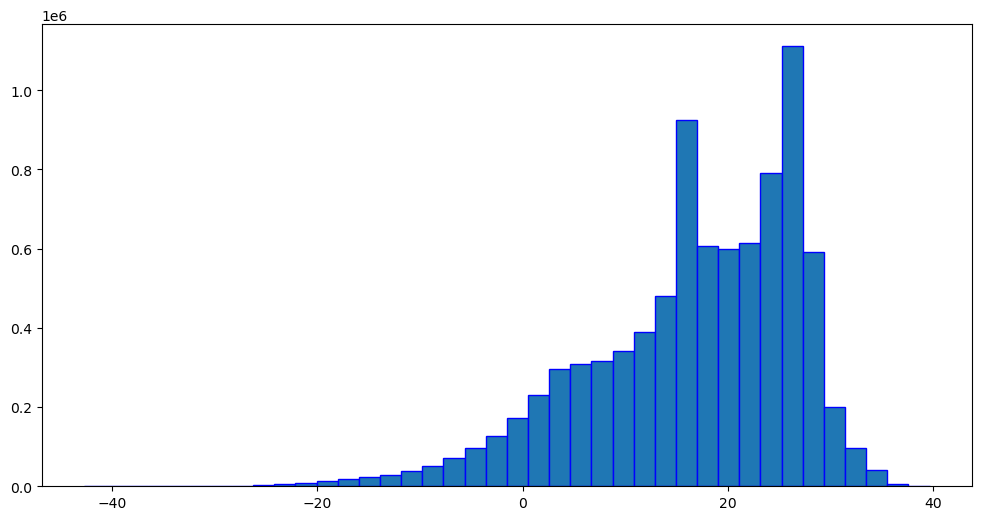

In [95]:
plt.figure(figsize=(12,6))
plt.hist(df.AverageTemperature,bins=40,edgecolor='b')

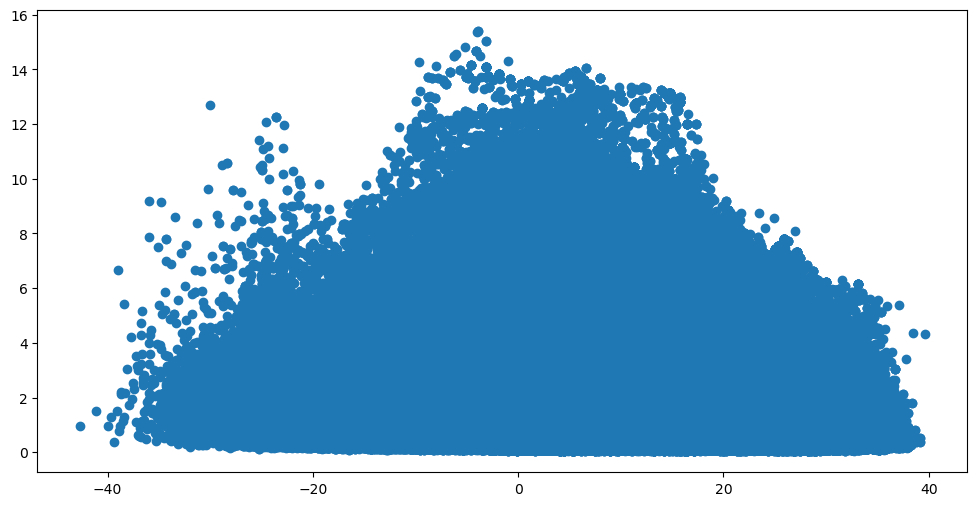

In [96]:
plt.figure(figsize=(12,6))
plt.scatter(df.AverageTemperature,df.AverageTemperatureUncertainty)

In [114]:
country_data=df[df['Country']=='New York'].copy()

In [123]:
country_data['dt']=pd.to_datetime(country_data['dt'],errors='coerce')

In [126]:
country_data['year']=country_data['dt'].dt.year

In [130]:
grouped_data = [group['AverageTemperature'] for _, group in country_data.groupby('year')]


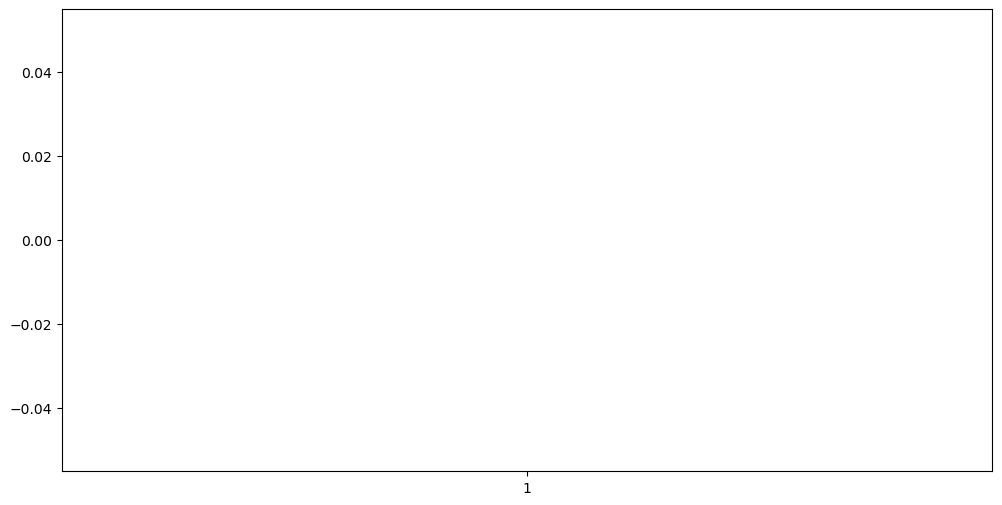

In [133]:
plt.figure(figsize=(12,6))
plt.boxplot(grouped_data,showfliers=True,patch_artist=True)
plt.show()

In [134]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [135]:
import seaborn as sns

In [137]:
tips=sns.load_dataset('tips')

In [138]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<Axes: xlabel='total_bill', ylabel='Count'>

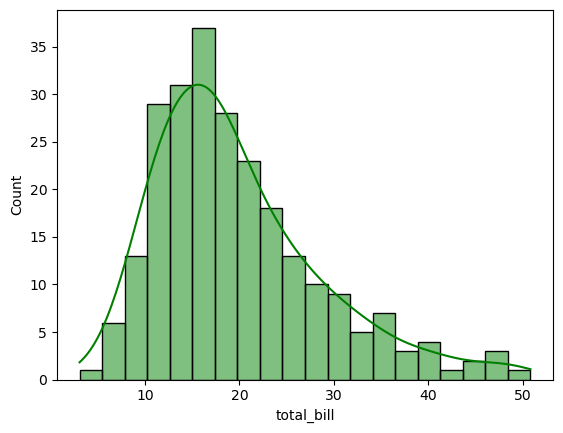

In [146]:
sns.histplot(data=tips,x="total_bill",bins=20,color='g',kde=True)

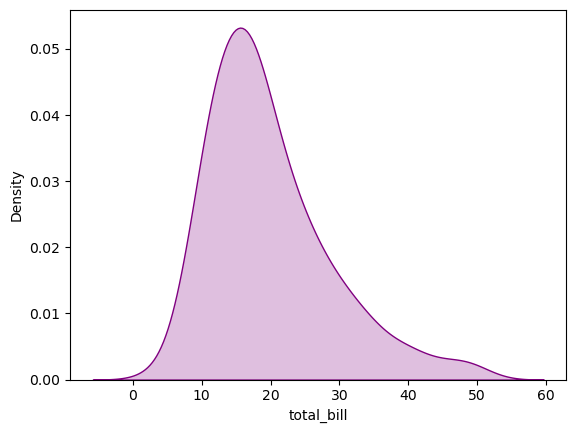

In [154]:
sns.kdeplot(data=tips,x="total_bill",fill=True,color="purple")
plt.show()

<Axes: xlabel='day', ylabel='total_bill'>

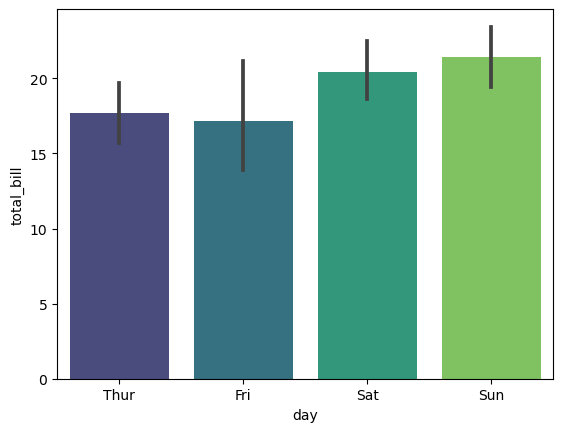

In [155]:
sns.barplot(data=tips,x="day",y="total_bill",palette="viridis")

<Axes: xlabel='day', ylabel='total_bill'>

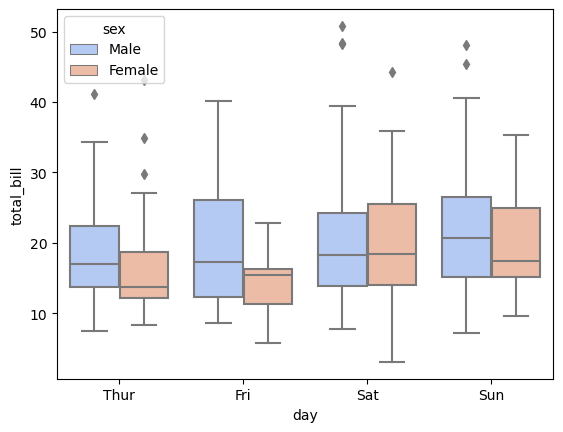

In [156]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette="coolwarm")

<Axes: xlabel='total_bill', ylabel='tip'>

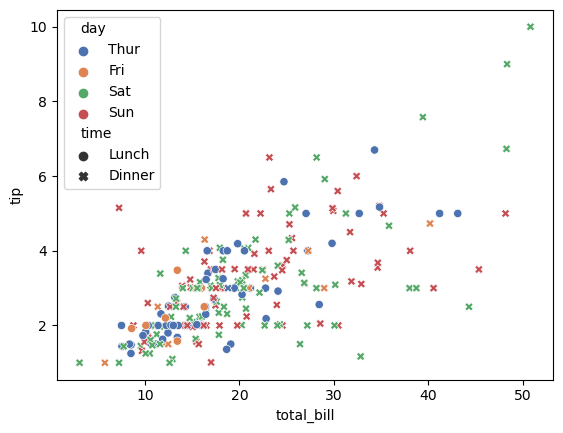

In [157]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="deep")

<Axes: xlabel='size', ylabel='tip'>

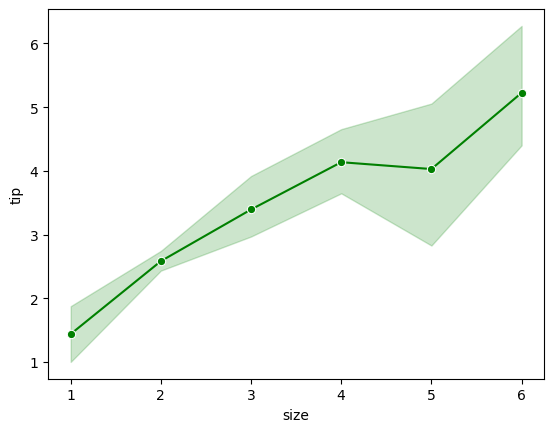

In [158]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="g")

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


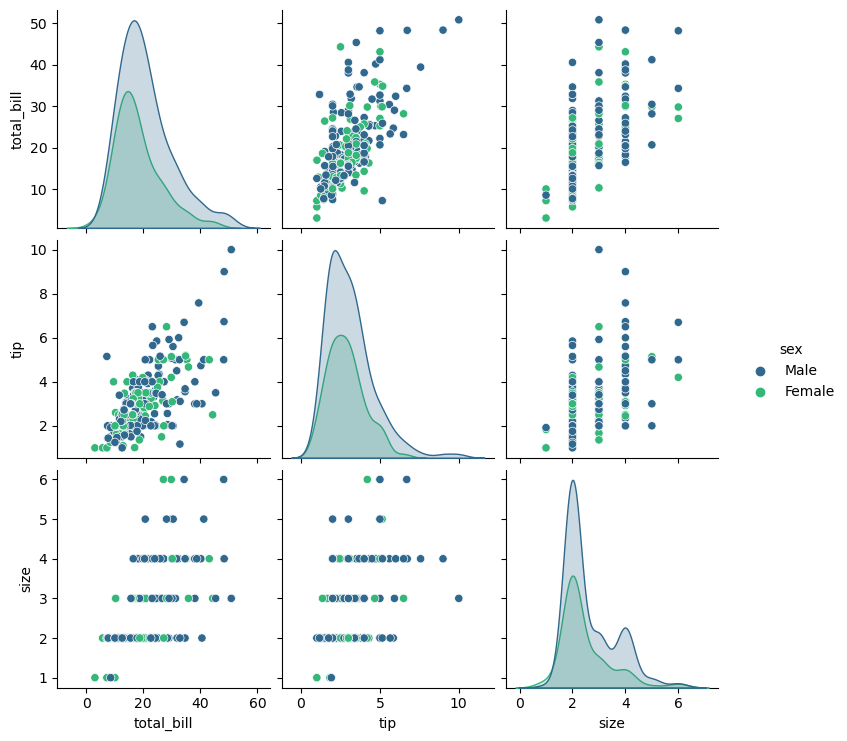

In [168]:
sns.pairplot(data=tips,hue="sex",palette="viridis")
plt.show()

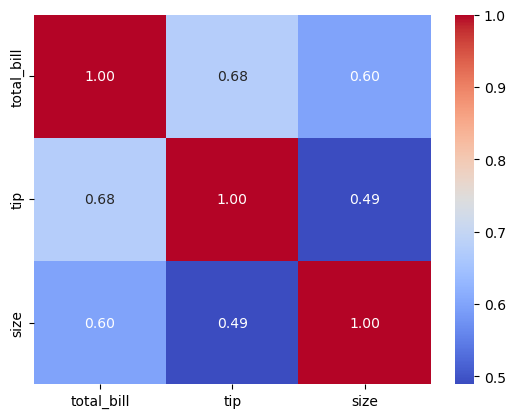

In [169]:
tips=tips.select_dtypes(include=['number'])
correlation_matrix=tips.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [172]:
test=pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'